In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

# データ
国内株式
639.03億円

国内債権
459.69億円

世界株式
883.18億円

世界債権
126.07億円

In [2]:
mc = np.array([[639.03, 459.69, 883.18, 126.07]]).T

In [3]:
w = mc/mc.sum()
w

array([[ 0.30314948],
       [ 0.21807236],
       [ 0.41897181],
       [ 0.05980635]])

In [4]:
corr = np.array([[ 1.        , -0.31443894,  0.47767142,  0.61013571],
       [-0.31443894,  1.        , -0.16928778, -0.23719114],
       [ 0.47767142, -0.16928778,  1.        ,  0.72432726],
       [ 0.61013571, -0.23719114,  0.72432726,  1.        ]])
corr

array([[ 1.        , -0.31443894,  0.47767142,  0.61013571],
       [-0.31443894,  1.        , -0.16928778, -0.23719114],
       [ 0.47767142, -0.16928778,  1.        ,  0.72432726],
       [ 0.61013571, -0.23719114,  0.72432726,  1.        ]])

In [5]:
std = np.array([[1.521491, 0.144068, 0.692152, 1.629491]])
std

array([[ 1.521491,  0.144068,  0.692152,  1.629491]])

In [6]:
Sigma = corr * np.dot(std.T, std)
Sigma

array([[ 2.31493486, -0.06892444,  0.50303722,  1.51268255],
       [-0.06892444,  0.02075559, -0.01688086, -0.0556824 ],
       [ 0.50303722, -0.01688086,  0.47907439,  0.81693645],
       [ 1.51268255, -0.0556824 ,  0.81693645,  2.65524092]])

In [7]:
delta = 2.5
tau = 0.05

In [8]:
r_eq = delta * np.dot(Sigma, w)
r_eq

array([[ 2.46991804],
       [-0.06692738],
       [ 0.99597719],
       [ 2.36874937]])

In [9]:
# 相関をarrayで現し、合わせて1になるるように設定。[国内株式,国内債券,世界株式,世界債券]
# 国内債券 < 世界債券 アウトバーン5%で0.1%の確信度
# 国内株式 > 世界株式 アウトバーン3%で0.085%の確信度
P = np.array([
        [0,-1,0,1],
        [1,0,-1,0]])
# どれぐらいアウトバーンするか
Q = np.array([[0.05],[0.03]])
# 確信度
Omega = np.array([
        [0.001065383332,0],
        [0,0.0008517381]])

In [10]:
r_posterior = r_eq + np.dot( np.dot( tau*np.dot(Sigma,P.T), np.linalg.inv(tau*np.dot(np.dot(P,Sigma),P.T)+Omega)), (Q-np.dot(P,r_eq)))

In [11]:
Sigma_posterior = Sigma + tau*Sigma - tau*np.dot( np.dot( np.dot(Sigma,P.T), np.linalg.inv(tau*np.dot(np.dot(P,Sigma),P.T)+Omega)), tau*np.dot(P,Sigma))

In [12]:
w_posterior = np.dot(np.linalg.inv(delta*Sigma_posterior), r_posterior)

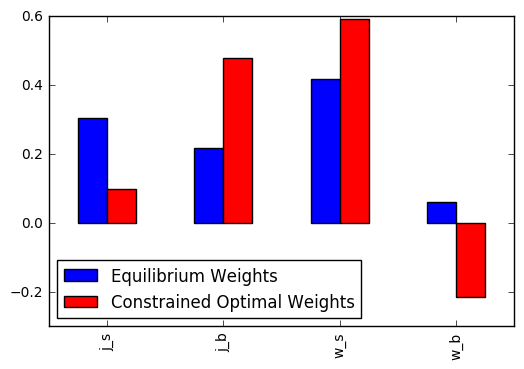

In [13]:
df = pd.DataFrame([w.reshape(4),w_posterior.reshape(4)],
                  columns=["j_s","j_b","w_s","w_b"],
                  index=['Equilibrium Weights','Constrained Optimal Weights'])
df.T.plot(kind='bar', color='br')